***CLOSING STOCK PRICE PREDICTION USING NEURAL NETWORK***

*This program uses an  artificial neural network called Long Short Term Memory (LSTM)
to predict the closing stock of a corporation-Google using the past 60 days*

In [82]:
#Import libraries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [113]:
#getting the stock quote 
df=web.DataReader('GOOG', data_source='yahoo', start='2015-01-01', end='2021-05-27')

In [114]:
#showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447563.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059840.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899940.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065054.0,499.727997
2015-01-08,502.101471,489.655640,496.626526,501.303680,3353582.0,501.303680
...,...,...,...,...,...,...
2021-05-21,2369.000000,2342.370117,2365.989990,2345.100098,1139600.0,2345.100098
2021-05-24,2418.479980,2360.110107,2367.000000,2406.669922,1062200.0,2406.669922
2021-05-25,2432.889893,2402.989990,2420.000000,2409.070068,941900.0,2409.070068


In [115]:
#Number of rows and columns
df.shape

(1612, 6)

In [116]:
#checking if the data has missing values
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

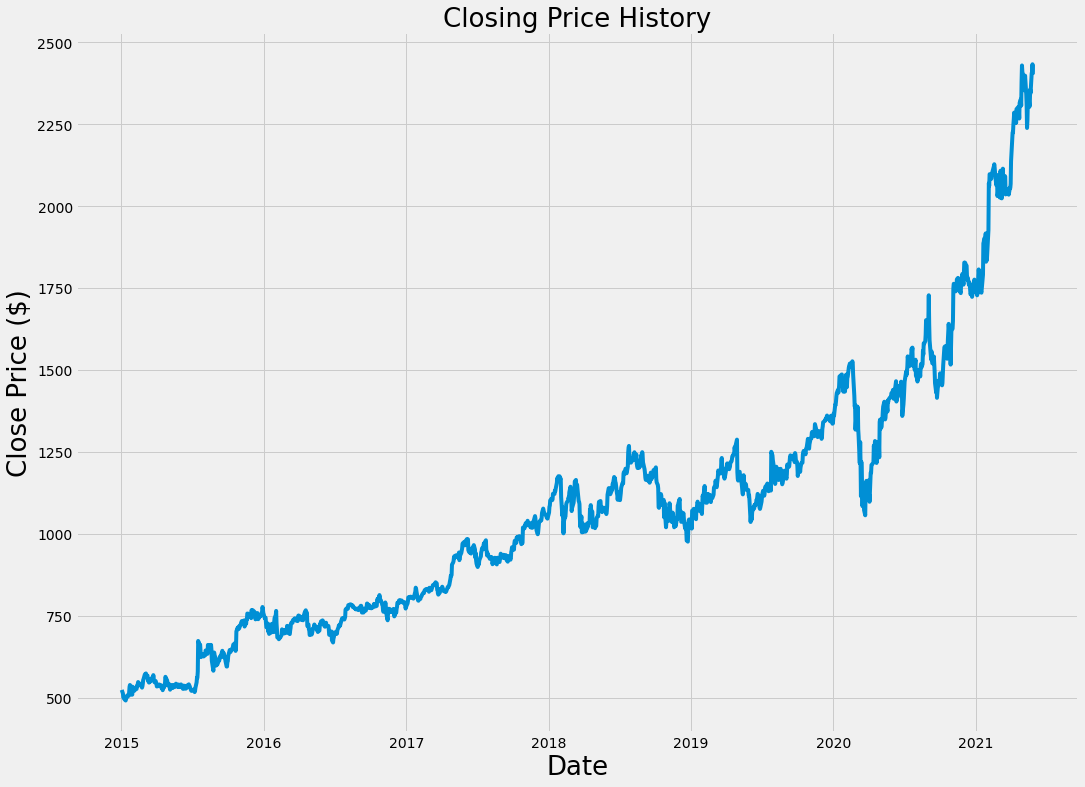

In [117]:
#Data visualizatio-Closing price 
plt.figure(figsize=(16,12))
plt.title('Closing Price History', fontsize=26)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Close Price ($)', fontsize=26)
plt.plot(df['Close'])
plt.show()

In [88]:
#Creating a new dataframe with only the 'Close' clumn
data=df.filter(['Close'])
data

,Close
Date,
2015-01-02,523.373108
2015-01-05,512.463013
2015-01-06,500.585632
2015-01-07,499.727997
2015-01-08,501.303680
...,...
2021-05-21,2345.100098
2021-05-24,2406.669922
2021-05-25,2409.070068


In [89]:
#Convert the dataframe into a numpy array
dataset=data.values

In [90]:
#Getting the number of rows to train the model- We will train about 80% of the data we have
#we round it up using math.ceil function
training_data_len=math.ceil(len(dataset)*0.8)

In [91]:
#show the number of rows that we are training
training_data_len

1290

In [92]:
#Scaling the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [93]:
scaled_data

array([[0.01656346],
       [0.01094645],
       [0.00483143],
       ...,
       [0.98740689],
       [1.        ],
       [0.98402947]])

In [94]:
#Create the training dataset
#create the scaled training dataset
train_data=scaled_data[0:training_data_len , :]

In [46]:
# splitting the data into X_train and y_train datasets 
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03982999, 0.04573918, 0.04694175,
       0.04719055, 0.03897989, 0.05177276, 0.05921626, 0.05560856,
       0.05865644, 0.05869791, 0.0605847 , 0.0613726 , 0.05927846,
       0.06091645, 0.06568526, 0.07161518, 0.07489115, 0.07617666,
       0.07773171, 0.07957703, 0.07901721, 0.08119428, 0.08845118,
       0.08673025, 0.07972216, 0.0831018 , 0.07903796, 0.08034418,
       0.08090401, 0.07920381, 0.07478749, 0.07518142, 0.07630106,
       0.07084803, 0.06614141, 0.07072361, 0.06894049, 0.07176031,
       0.07609372, 0.07905868, 0.07704749, 0.07373005, 0.0764462 ,
       0.07536804, 0.06850508, 0.0702882 , 0.06823554, 0.07470455])]
[0.07068215358294894]

[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03

In [95]:
#Converting the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [96]:
#Reshape the data since LSTM needs a three-dimensional data set
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [97]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [98]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [99]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1230/1230 [==============================] - 20s 16ms/step - loss: 4.4256e-04


In [100]:
#Create the test dataset
#Create a new array
test_data=scaled_data[training_data_len-60:, :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [101]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [102]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [103]:
#Get the models predicted Price values 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [104]:
#Evaluating the model using the Root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

20.124968155570652

<ipython-input-105-7ca77e83e1c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


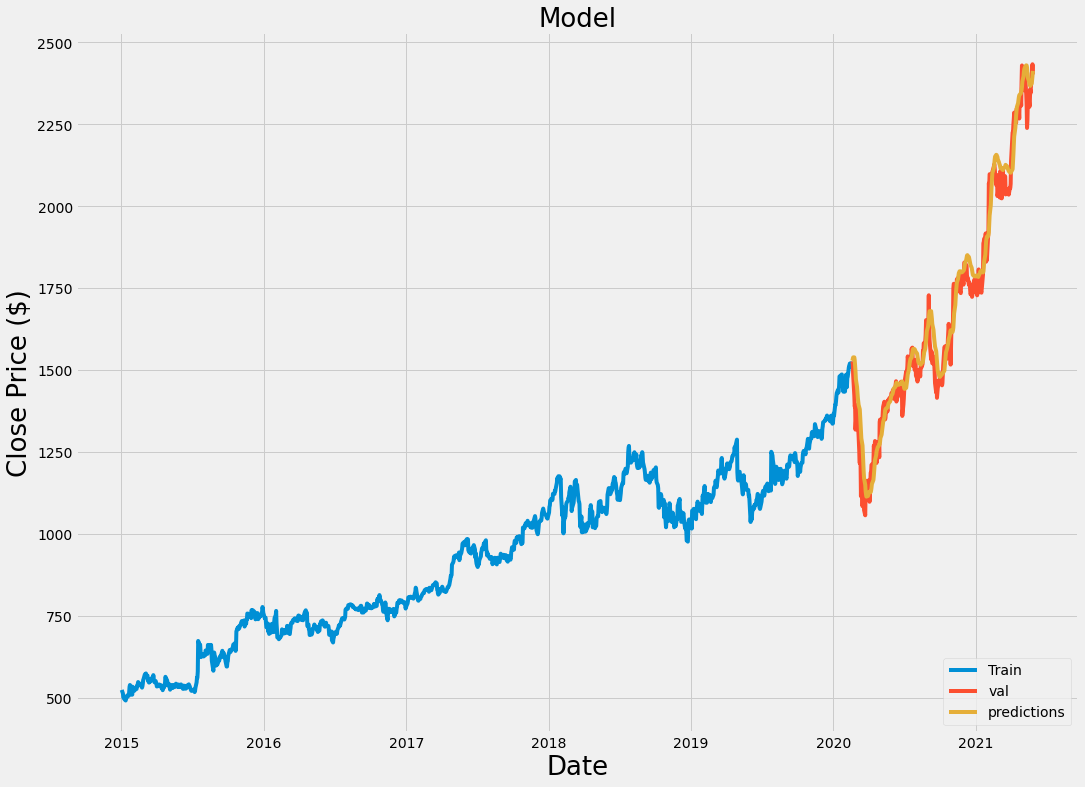

In [105]:
#PLOT THE DATA
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#Visualize
plt.figure(figsize=(16,12))
plt.title('Model', fontsize=26)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Close Price ($)', fontsize=26)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','val','predictions'], loc='lower right')
plt.show()

In [106]:
#Showing the valid prices and the predicted 
valid

,Close,predictions
Date,,
2020-02-19,1526.689941,1528.427246
2020-02-20,1518.150024,1534.420776
2020-02-21,1485.109985,1538.780273
2020-02-24,1421.589966,1538.684326
2020-02-25,1388.449951,1530.071411
...,...,...
2021-05-21,2345.100098,2369.996094
2021-05-24,2406.669922,2374.190186
2021-05-25,2409.070068,2384.684082


**Predict a future price**


In [108]:
#Get the quote
google_quote=web.DataReader('GOOG', data_source='yahoo',start='2015-01-01', end='2021-05-27')
#Create a new dataframe
new_df=google_quote.filter(['Close'])
#Get the last 60 days closing price and convert the dataframe into an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)
#create and empty
x_test=[]
#append the last 60 days
x_test.append(last_60_days_scaled)
#convert the X_test to a numpy array
x_test=np.array(x_test)
#Reshape
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price 
pred_price=model.predict(x_test)
#undo scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[2425.8262]]


In [109]:
google1_quote1=web.DataReader('GOOG', data_source='yahoo',start='2021-05-28', end='2021-05-28')
google1_quote1['Close']

Date
2021-05-28    2411.560059
2021-05-28    2411.560059
Name: Close, dtype: float64